<h1>SI 370 Homework 7</h1>
<h2>Class Cheat Sheet: 6 Steps to Data Science</h2>
<p>
    Haley Johnson<br>
    Data source: <a href = "https://www.kaggle.com/datasets/thedevastator/scraping-apartments-off-of-craigslist-in-san-fra">Housing Prices in San Francisco (Craigslist)</a> hosted on Kaggle 
    

</p>

In [209]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn import manifold
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
df = pd.read_csv('data/raw_sf_scrape.csv')

In [82]:
df.head()

,date,title,link,price,brs,sqft,hood,bath,amenities
0,Oct 1,"3D Virtual Tour - 2 BR, 2 BA Condo 966 Sq. Ft....",https://sfbay.craigslist.org/sfc/apa/d/san-fra...,3850,2.0,966.0,Mission Bay,2Ba,"['condo', 'w/d in unit', 'attached garage']"
1,Oct 1,Beautiful house for rent,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,900,1.0,NaN,portola district,0Ba,['house']
2,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
3,Oct 1,4 BEDROOM APARTMENT IN THE HAIGHT,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4995,4.0,NaN,haight ashbury,2Ba,"['apartment', 'w/d in unit', 'street parking']"
4,Oct 1,ENJOY GOLDEN GATE PARK EVERYDAY,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,2800,2.0,700.0,USF / panhandle,1Ba,"['apartment', 'laundry in bldg', 'no smoking',..."


In [83]:
df.columns = ['date', 'title', 'link', 'price', 'bedrooms', 'square_feet', 'neighborhood', 'bathrooms', 'amenities']

<h3>Exploratory Data Analysis</h3>

In [33]:
n_rows, n_columns = df.shape
print(f"There are {n_rows} rows and {n_columns} columns in the dataset")

There are 3093 rows and 9 columns in the dataset


In [34]:
columns = df.columns

for column in columns:
    missing_values = pd.isnull(df[column]).sum()
    print(f"There are {missing_values} in {column}")

There are 0 in date
There are 0 in title
There are 0 in link
There are 0 in price
There are 617 in brs
There are 1632 in sqft
There are 31 in hood
There are 51 in bath
There are 0 in amenities


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3093.0,3318.156159,1710.975464,1.0,2395.0,2995.0,3933.0,29000.0
brs,2476.0,1.836430,0.948098,1.0,1.0,2.0,2.0,7.0
sqft,1461.0,1202.036277,1316.612823,110.0,650.0,902.0,1240.0,11020.0


In [36]:
df.describe(include=np.number)

,price,brs,sqft
count,3093.000000,2476.000000,1461.000000
mean,3318.156159,1.836430,1202.036277
std,1710.975464,0.948098,1316.612823
min,1.000000,1.000000,110.000000
25%,2395.000000,1.000000,650.000000
50%,2995.000000,2.000000,902.000000
75%,3933.000000,2.000000,1240.000000
max,29000.000000,7.000000,11020.000000


In [37]:
df.describe(exclude=np.number)

,date,title,link,hood,bath,amenities
count,3093,3093,3093,3062,3042,3093
unique,2,2658,2879,113,12,923
top,Oct 1,1 bedroom/1 bath in Polk,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,SOMA / south beach,1Ba,['apartment']
freq,2857,17,2,342,2140,115


In [39]:
df.date.describe()

count       3093
unique         2
top       Oct  1
freq        2857
Name: date, dtype: object

In [41]:
df.hood.value_counts()

SOMA / south beach                342
mission district                  251
pacific heights                   190
nob hill                          177
lower nob hill                    163
                                 ... 
San Franciso Richmond District      1
san francisco                       1
Tenderloin                          1
SAN FRANCISCO                       1
Cow Hollow                          1
Name: hood, Length: 113, dtype: int64

In [57]:
df.groupby('bedrooms')['price'].agg(['max', 'mean'])

,max,mean
bedrooms,,
1.0,7200,2781.439312
2.0,26500,3829.589120
3.0,29000,4727.661111
4.0,16995,5564.831858
5.0,17000,6955.862069
6.0,10000,7424.750000
7.0,9995,9995.000000


In [58]:
neighborhood_1 = df[df.neighborhood == 'mission district']
neighborhood_2 = df[df.neighborhood == 'haight ashbury']

along_rows = pd.concat([neighborhood_1, neighborhood_2], axis = 0)

In [204]:
same_day_listings = neighborhood_1.merge(neighborhood_2, on = 'date')

In [205]:
bed_bath_counts = pd.crosstab(index = df.bedrooms, columns = df.bathrooms, values = df.price, aggfunc = np.median)

<h3>Visualization</h3>

In [ ]:
# example code
x_dim, y_dim = 18, 24

sns.set(rc={'figure.figsize':(x_dim, y_dim)})

In [ ]:
# example code
n_rows, n_cols = 1, 2

f, axes = plt.subplots(n_rows, n_cols)

In [222]:
def set_price_bins(s):
    if s < 1000:
        return '[$0, $1000)'
    elif s < 2000: 
        return '[$1000, $2000)'
    elif s < 3000:
        return '[$2000, $3000)'
    elif s < 4000:
        return '[$3000, $4000)'
    elif s < 5000:
        return '[$4000, $5000)'
    elif s < 7500:
        return '[$5000, $7500)'
    elif s < 10000:
        return '[$7500, $10000)'
    else:
        return '$100000+'

In [223]:
df['price_bin'] = df.price.apply(set_price_bins)

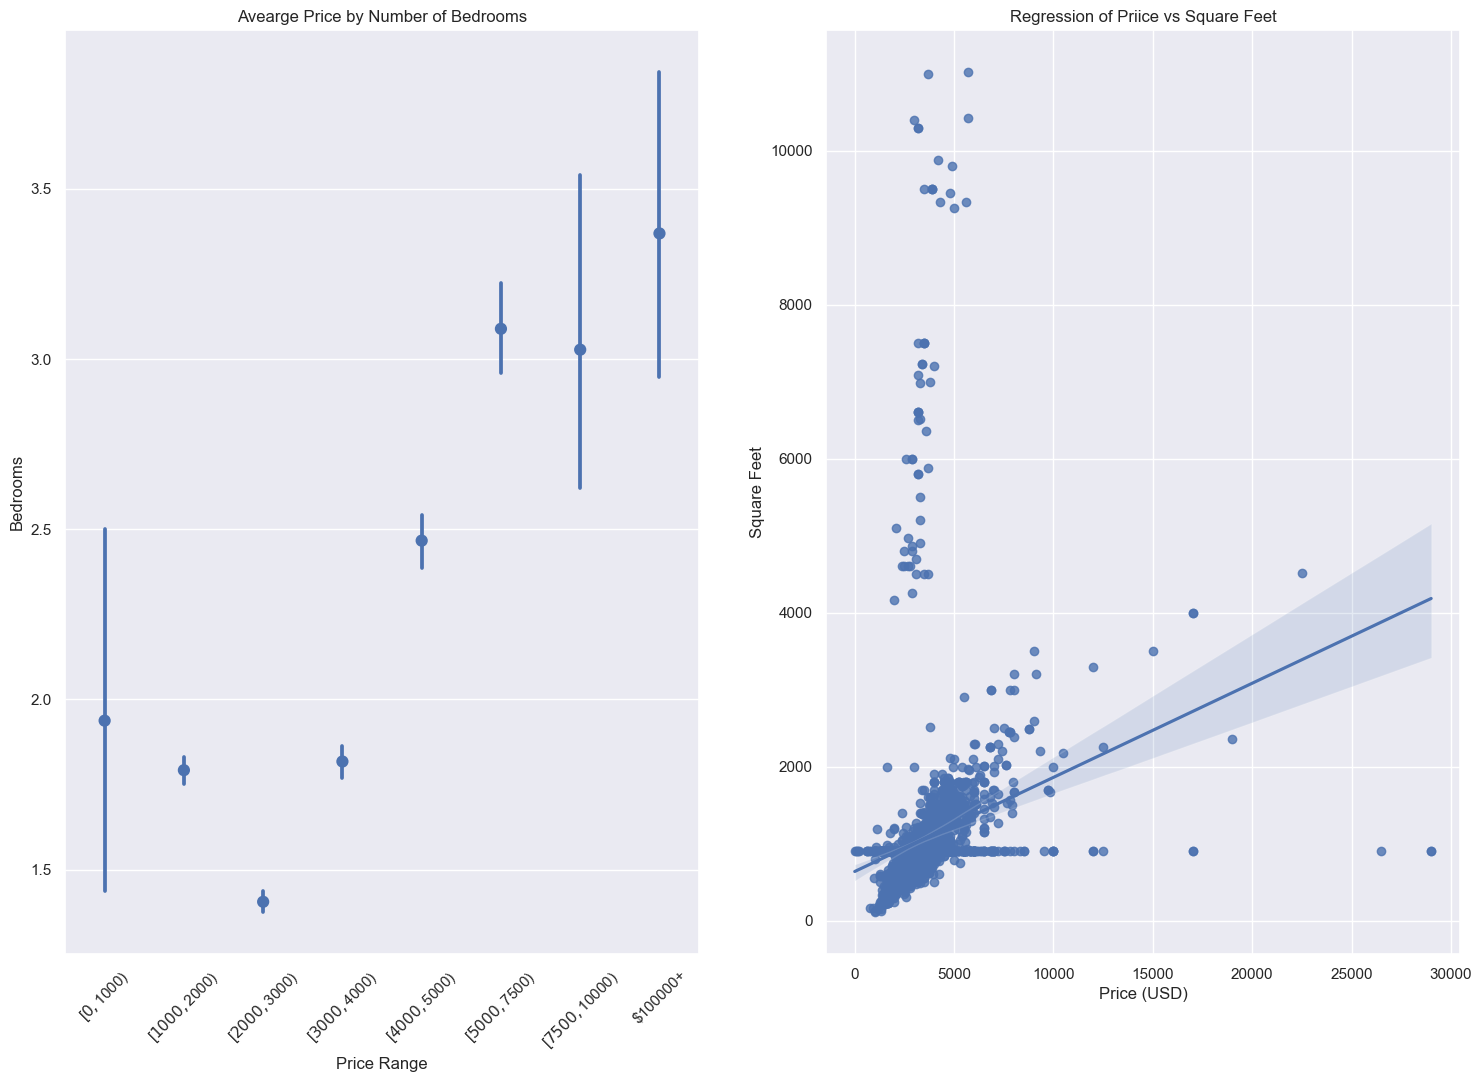

In [263]:
cat_order = ['[$0, $1000)', '[$1000, $2000)', '[$2000, $3000)', '[$3000, $4000)', '[$4000, $5000)', '[$5000, $7500)', '[$7500, $10000)', '$100000+']
sns.set(rc={'figure.figsize':(18, 12)})
f, axes = plt.subplots(1, 2)
f1 = sns.pointplot(x = df.price_bin, y = df.bedrooms, dodge = True, join = False, order = cat_order, ax = axes[0])
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)
_ = f1.set(title = 'Avearge Price by Number of Bedrooms', xlabel = 'Price Range', ylabel = 'Bedrooms')
f2 = sns.regplot(data = df, x = 'price', y = 'square_feet', ax = axes[1])
_ = f2.set(title = 'Regression of Priice vs Square Feet', xlabel = 'Price (USD)', ylabel = 'Square Feet')

<h3>Statistical Analysis</h3>

In [104]:
from scipy.stats import chi2_contingency
import scipy
import statsmodels

In [85]:
chi2, p_val, degrees_freedom, exp_val = scipy.stats.chi2_contingency(pd.crosstab(df.bedrooms, df.bathrooms))

In [101]:
df.bathrooms.value_counts()

df.bathrooms = pd.Series(np.where(df.bathrooms == 'splitBa', '0.5Ba', df.bathrooms))
df.bathrooms = pd.Series(np.where(df.bathrooms == 'sharedBa', '0.5Ba', df.bathrooms))
df.bathrooms = df.bathrooms.str.replace('Ba', '', regex = True).astype(float)

In [113]:
lm = statsmodels.formula.api.ols('price ~ bathrooms + bedrooms + square_feet + C(neighborhood)', data = df).fit()

In [206]:
anova_table = sm.stats.anova_lm(lm)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(neighborhood),112.0,4.890453e+08,4.366476e+06,4.111602,9.497182e-35
bathrooms,1.0,1.272714e+09,1.272714e+09,1198.424642,4.651864e-180
bedrooms,1.0,1.397122e+08,1.397122e+08,131.557132,6.715566e-29
square_feet,1.0,2.542741e+08,2.542741e+08,239.431963,3.617947e-49
Residual,1140.0,1.210667e+09,1.061989e+06,NaN,NaN


<h3>Dimension Reducation</h3>

In [131]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['square_feet'] = df['square_feet'].fillna(df['square_feet'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [133]:
X = df[['bedrooms', 'square_feet', 'bathrooms']]
y = df.price

mds = manifold.MDS(n_components = 2, metric = False, eps = 1e-9, random_state = 42, dissimilarity = 'euclidean', n_jobs = 1)
mds = mds.fit_transform(X)

In [135]:
mds_labelled = pd.concat([pd.DataFrame({'price':y}),pd.DataFrame(mds)], axis = 1)
mds_labelled.columns = ['price','dim_1','dim_2']

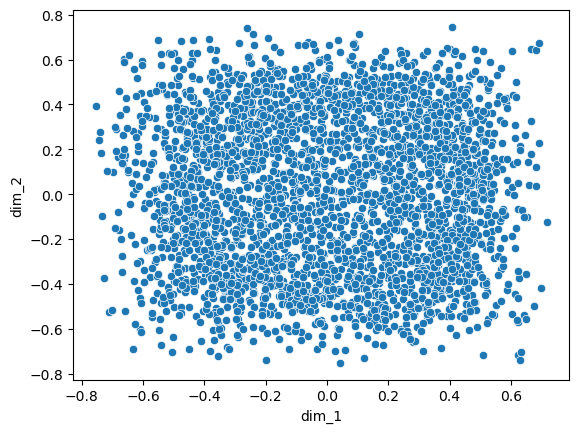

In [140]:
f = sns.scatterplot(data = mds_labelled, x = 'dim_1', y = 'dim_2')

<h3>Classification</h3>

In [178]:
X = df[['price', 'square_feet']]
y = df.bedrooms

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [194]:
estimators = {'gamma': ['scale',  'auto'], 'decision_function_shape': ['ovo', 'ovr']}
svc = SVC(random_state = 42)

svc_model = GridSearchCV(svc, estimators, cv = 3, verbose = 3.1)
svc_model.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV 1/3] END decision_function_shape=ovo, gamma=scale;, score=0.578 total time=   0.4s
[CV 2/3] END decision_function_shape=ovo, gamma=scale;, score=0.596 total time=   0.2s
[CV 3/3] END decision_function_shape=ovo, gamma=scale;, score=0.559 total time=   0.3s
[CV 1/3] END decision_function_shape=ovo, gamma=auto;, score=0.564 total time=   0.4s
[CV 2/3] END decision_function_shape=ovo, gamma=auto;, score=0.581 total time=   0.5s
[CV 3/3] END decision_function_shape=ovo, gamma=auto;, score=0.559 total time=   0.3s
[CV 1/3] END decision_function_shape=ovr, gamma=scale;, score=0.578 total time=   0.2s
[CV 2/3] END decision_function_shape=ovr, gamma=scale;, score=0.596 total time=   0.3s
[CV 3/3] END decision_function_shape=ovr, gamma=scale;, score=0.559 total time=   0.2s
[CV 1/3] END decision_function_shape=ovr, gamma=auto;, score=0.564 total time=   0.4s
[CV 2/3] END decision_function_shape=ovr, gamma=auto;, score=0.581 total time=   0.3s
[CV 3/3] END decision_function_shape=ovr, gamma=

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto']},
             verbose=3.1)

In [186]:
accuracy_score(svc_model.predict(X_test), y_test)

0.5633074935400517

In [189]:
classification_report(svc_model.predict(X_test), y_test, zero_division = 1)

'              precision    recall  f1-score   support\n\n         1.0       0.78      0.55      0.65       351\n         2.0       0.61      0.57      0.59       421\n         3.0       0.01      1.00      0.02         1\n         4.0       0.03      1.00      0.06         1\n         5.0       0.00      1.00      0.00         0\n         6.0       0.00      1.00      0.00         0\n         7.0       0.00      1.00      0.00         0\n\n    accuracy                           0.56       774\n   macro avg       0.21      0.87      0.19       774\nweighted avg       0.69      0.56      0.62       774\n'

<h3>NLP</h3>

In [148]:
df['title_lower'] = df.title.str.lower()
stopwords = nltk.corpus.stopwords.words('english')
df.title_lower = df.title_lower.apply(lambda s: " ".join([w for w in s.split() if w not in stopwords]))

In [151]:
X = df.title_lower
y = df.price 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [153]:
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', max_features = 500)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [195]:
estimators = {'gamma': ['scale',  'auto'], 'decision_function_shape': ['ovo', 'ovr']}
svc = SVC(random_state = 42)

svc_model = GridSearchCV(svc, estimators, cv = 3, verbose = 3.1)
svc_model.fit(X_train_tfidf, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/haleyjohnson/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV 1/3] END decision_function_shape=ovo, gamma=scale;, score=0.665 total time=   0.6s
[CV 2/3] END decision_function_shape=ovo, gamma=scale;, score=0.665 total time=   0.4s
[CV 3/3] END decision_function_shape=ovo, gamma=scale;, score=0.651 total time=   0.4s
[CV 1/3] END decision_function_shape=ovo, gamma=auto;, score=0.471 total time=   0.3s
[CV 2/3] END decision_function_shape=ovo, gamma=auto;, score=0.470 total time=   0.3s
[CV 3/3] END decision_function_shape=ovo, gamma=auto;, score=0.470 total time=   0.3s
[CV 1/3] END decision_function_shape=ovr, gamma=scale;, score=0.665 total time=   0.9s
[CV 2/3] END decision_function_shape=ovr, gamma=scale;, score=0.665 total time=   0.4s
[CV 3/3] END decision_function_shape=ovr, gamma=scale;, score=0.651 total time=   0.5s
[CV 1/3] END decision_function_shape=ovr, gamma=auto;, score=0.471 total time=   0.3s
[CV 2/3] END decision_function_shape=ovr, gamma=auto;, score=0.470 total time=   0.3s
[CV 3/3] END decision_function_shape=ovr, gamma=

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto']},
             verbose=3.1)

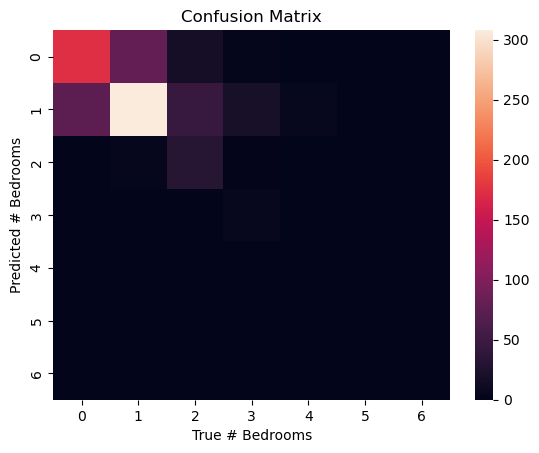

In [203]:
cm = confusion_matrix(svc_model.predict(X_test_tfidf), y_test)
f = sns.heatmap(cm)
_ = f.set(title = 'Confusion Matrix', xlabel = 'True # Bedrooms', ylabel = 'Predicted # Bedrooms')